In [1]:
import pandas as pd
import datetime
import json
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras import layers
from matplotlib.image import imread
from keras.preprocessing import image
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:

stocks = ['ITCI', 'AXSM', 'CVM', 'KRTX', 'APLS', 'PRVB', 'CRTX', 'EPZM',
       'CRBP', 'CCXI', 'TGTX', 'IMGN', 'FATE', 'AKBA', 'DNLI', 'RIGL', 
       'PRNB', 'ARVN', 'ZYME', 'MRNA', 'CYTK', 'FTSV', 'ASND',
       'XBIT', 'ALEC', 'ORTX', 'ADVM', 'MGNX', 'AKRO', 'ESPR', 'BHVN',
       'YMAB', 'RGNX', 'MYOK', 'TPTX', 'ATNX', 'BLUE', 'AGEN', 'AVRO',
       'DCPH', 'CTMX', 'SRNE', 'ARDX', 'BCRX', 'RETA', 'KOD', 'DTIL',
       'RARX', 'AUTL', 'GTHX', 'CARA', 'KDMN', 'XNCR', 'ACHN', 'ARNA',
       'RCKT', 'TBIO', 'VYGR', 'SGMO', 'ODT', 'ANAB', 'ATRA', 'CNST',
       'GERN', 'BPMC', 'ALLO', 'BBIO', 'FGEN', 'PGNX', 'MGTX', 'NXTC',
       'IMMU', 'ZIOP', 'CRSP', 'IOVA', 'VKTX', 'EIDX', 'MYOV', 'AMRS',
       'KRYS', 'KURA', 'MDGL', 'UBX', 'TCDA', 'QURE', 'MRTX', 'ASMB',
       'GLYC', 'RYTM', 'FIXX', 'DRNA', 'ARWR', 'ALLK', 'GOSS', 'WVE']
 
with open('1_31_2020_pull.json', 'r') as file:
    data = json.load(file)

start = datetime.datetime.now()
period = [1, 2]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_1'] = _low
        stock_dict_list[index]['Max_1'] = _max
    data[stock] = stock_dict_list

# # 3 Day Max/Min Value (% Difference from Closing Price)
# # The range is from the 2nd day to the 3rd after the input day
# start = datetime.datetime.now()
# period = [2, 4]
# for stock in stocks:
    
#     stock_dict_list = data[stock]
#     num_days = len(stock_dict_list)
#     for index, dict_ in enumerate(stock_dict_list):
#         _open = dict_['Open']
#         if index+period[1] >= num_days:
#             _low = None
#             _max = None
#         else:
#             _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#             _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#         stock_dict_list[index]['Low_3'] = _low
#         stock_dict_list[index]['Max_3'] = _max
#     data[stock] = stock_dict_list

# # 10 Day Max/Min Value (% Difference from Closing Price)
# # The range is from the 4th day to the 10th after the input day

# start = datetime.datetime.now()
# period = [4, 11]
# for stock in stocks:
    
#     stock_dict_list = data[stock]
#     num_days = len(stock_dict_list)
#     for index, dict_ in enumerate(stock_dict_list):
#         _open = dict_['Open']
#         if index+period[1] >= num_days:
#             _low = None
#             _max = None
#         else:
#             _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#             _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#         stock_dict_list[index]['Low_10'] = _low
#         stock_dict_list[index]['Max_10'] = _max
#     data[stock] = stock_dict_list

# # 30 Day Max/Min Value (% Difference from Closing Price)
# # The range is from the 11th day to the 30th after the input day
# start = datetime.datetime.now()
# period = [11, 31]
# for stock in stocks:
    
#     stock_dict_list = data[stock]
#     num_days = len(stock_dict_list)
#     for index, dict_ in enumerate(stock_dict_list):
#         _open = dict_['Open']
#         if index+period[1] >= num_days:
#             _low = None
#             _max = None
#         else:
#             _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#             _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
#         stock_dict_list[index]['Low_30'] = _low
#         stock_dict_list[index]['Max_30'] = _max
#     data[stock] = stock_dict_list

for stock in stocks:
    df = pd.DataFrame(data[stock])
    max_value = df[['High', 'Low', 'Open', 'Close', 'Adj Close']].max()
    df[['High', 'Low', 'Open', 'Close', 'Adj Close']] = df[['High', 'Low', 'Open', 'Close', 'Adj Close']]/max_value
    df['Volume'] = df['Volume']/ df['Volume'].max()
    df= df.dropna()
    data[stock] = df.to_dict('records')

    
period = 60 # days of trading
for stock in stocks:
    
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list): 
        if index-period < 0:
            empty_array = None
            
        else:
            high = [dict_['High'] for dict_ in stock_dict_list[index-period:index]]
            low = [dict_['Low'] for dict_ in stock_dict_list[index-period:index]]
            volume = [dict_['Volume'] for dict_ in stock_dict_list[index-period:index]]
            open_ = [dict_['Open'] for dict_ in stock_dict_list[index-period:index]]
            ad_close = [dict_['Adj Close'] for dict_ in stock_dict_list[index-period:index]]
            close = [dict_['Close'] for dict_ in stock_dict_list[index-period:index]]
            high_change = [dict_['Max_1'] for dict_ in stock_dict_list[index-period:index]]
            low_change = [dict_['Low_1'] for dict_ in stock_dict_list[index-period:index]]
            empty_array = [high, low, open_, close, ad_close, volume, high_change, low_change]
            empty_array = np.array(empty_array).reshape(60,8)
        stock_dict_list[index]['Target'] = empty_array
    
    data[stock] = stock_dict_list
        
for stock in stocks:
    df = pd.DataFrame(data[stock])
    df= df.dropna()
    data[stock] = df.to_dict('records')

    
data_list = []

for stock in stocks:
    for dict_ in data[stock]:
        list_ = [0, 0, 0, 0, 0, 0, 0]
        if dict_['Low_1'] <= -0.10:
            list_[0] = 1      
        else:
            if dict_['Low_1'] <= -0.075:
                list_[1] = 1
            else:
                if dict_['Low_1'] <= -0.05:
                    list_[2] = 1
                else:
                    if dict_['Low_1'] <= -0.025:
                        list_[3] = 1
                    else:
                        if dict_['Low_1'] <= -0.01:
                            list_[4] = 1
                        else:
                            if dict_['Low_1'] < 0:
                                list_[5] = 1
                            else:
                                list_[6] = 1

        dict_['Low_1'] =list_

        data_list.append(dict_)

        


In [3]:
seq_length = 60

model = models.Sequential()
model.add(layers.Conv1D(128, 3, activation='relu',  input_shape=(60, 8)))
model.add(layers.AveragePooling1D(3))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.AveragePooling1D(3))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(50, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(100, return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


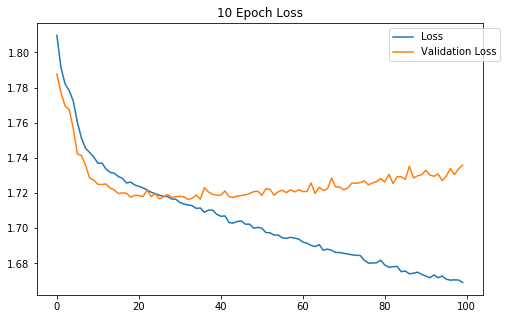

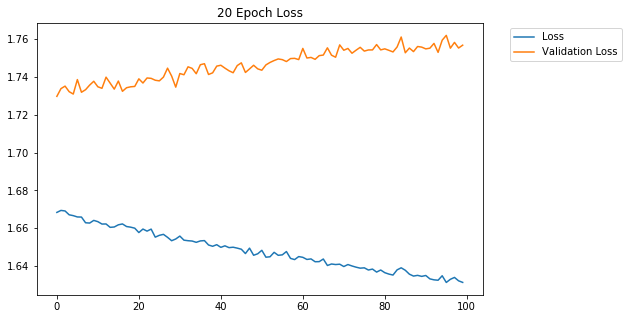

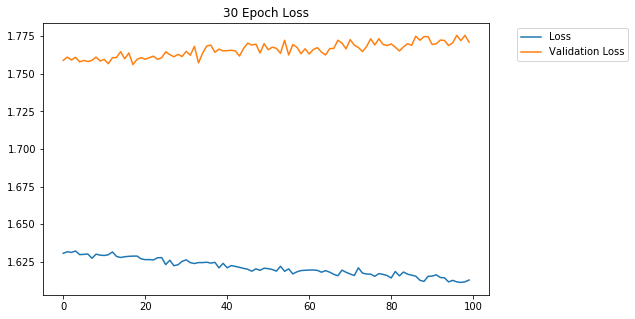

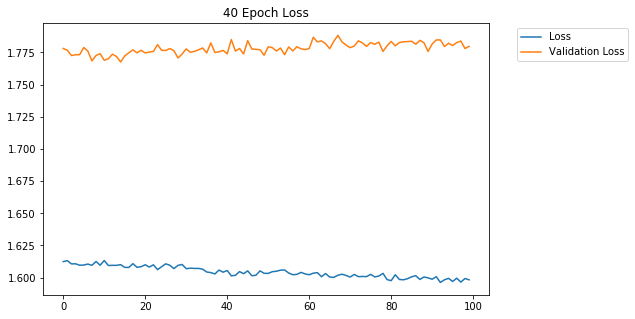

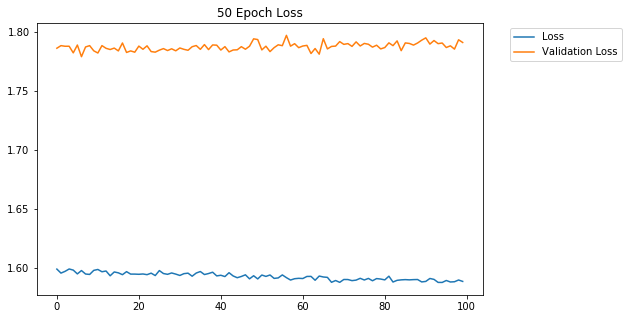

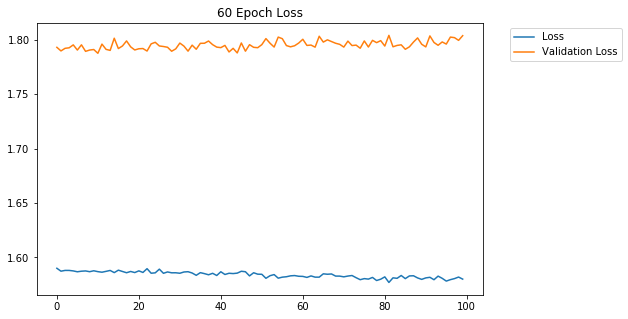

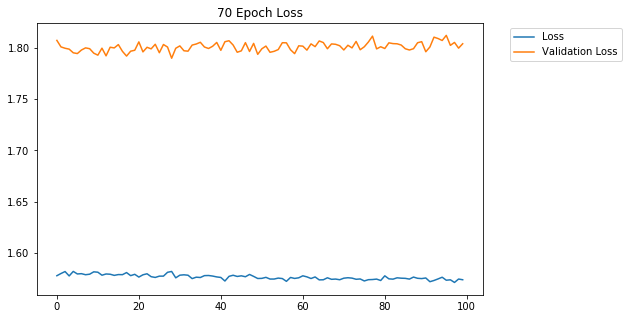

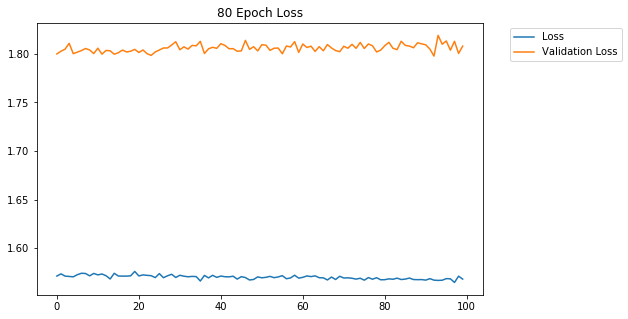

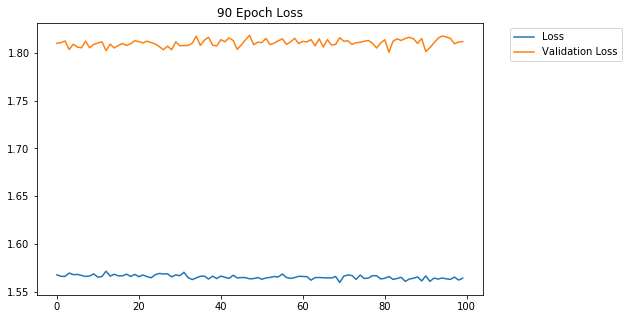

In [4]:
for i in range(1, 10):
    stock ='SGMO'
    X = [i['Target'] for i in data_list]
    X = np.array(X)
    y = [i['Low_1'] for i in data_list]
    y = np.array(y).reshape(len(y),7)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train, batch_size=100, epochs=100, validation_split=0.2, verbose=0 )
    dict_ = model.history.history
    plt.figure(figsize=(8,5))
    plt.title(f"{i*10} Epoch Loss")
    plt.plot(dict_['loss'], label = 'Loss')
    plt.plot(dict_['val_loss'], label= 'Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    predict_ = model.predict(X)


    model.save_weights(f'model_conv1d_{i*100}.h5')